# Benchmarking runtime of Laptop with differing Cores / Rules

In [2]:
from minedatabase import pickaxe, rules
from time import time
from collections import defaultdict
from IPython.display import clear_output
import pandas as pd
import seaborn as sns

class StopWatch():
    def __init__(self):
        self._start = time()

    def start(self):
        self._start = time()

    def tick(self):
        return time() - self._start

## Set up parameters for rule sweep
Fixed Params

In [7]:
n_cores = 6
input_cpds = "../inputs/ymdb_smiles_sanitized_600.csv"

timer = StopWatch()

In [8]:
run_results_nrule = dict()

In [9]:
# ((1, 0.046), (3, 0.1), (7, 0.2), (12, 0.3), (20, 0.4), (33, 0.5), (56, 0.6), (97, 0.7), (185, 0.8), (413, 0.9), (1216, 1))
for n_cores in [6]:
    for n_rules, f_rules in [(500, 0.9213), (750, .9607), (1216, 1)]:#[(250, 0.8401)]: #, (500, 0.9213), (750, .9607)]:#(12, 0.3), (20, 0.4), (33, 0.5)):# ((1, 0.046), (3, 0.1), (7, 0.2), (12, 0.3)):#, (20, 0.4), (33, 0.5)): #  #, 
        print("-"*10, n_rules, "-"*10)
        # Init Run
        timer.start()

        # Load Rules
        rule_io, correactant_list, _ = rules.metacyc_generalized(n_rules=n_rules)

        # Load Pickaxe
        pk = pickaxe.Pickaxe(coreactant_list=correactant_list, rule_list=rule_io)
        cpds = pk.load_compound_set(input_cpds)
        print("n_rules: ", len(pk.operators))

        pk.transform_all(processes=n_cores, generations=1)

        # End Run
        run_time = timer.tick()

        run_results_nrule[f"run_n_rule_{n_rules}_n_core_{n_cores}"] = {
            "n_cores": n_cores,
            "f_rules": f_rules, #n_rules/1224, # 1224 is total reactions
            "n_rules": n_rules,
            "run_time": run_time,
            "new_cpds": len(pk.compounds) - len(cpds),
            "new_rxns": len(pk.reactions)
        }
        clear_output()

In [10]:
rule_runs_new = pd.DataFrame(run_results_nrule.values(), index=run_results_nrule.keys())
rule_runs_new = rule_runs_new.reset_index().rename(columns={"index": "run"})
# rule_runs1.to_csv("cores_1357_rules_137.csv")
# rule_runs1 = pd.read_csv("cores_1357_rules_137.csv", index_col=0)
# rule_runs1 = pd.concat([rule_runs, rule_runs1])

In [13]:
rule_runs_new

,run,n_cores,f_rules,n_rules,run_time,new_cpds,new_rxns
0,run_n_rule_500_n_core_6,6,0.9213,500,3659.817706,574243,892343
1,run_n_rule_750_n_core_6,6,0.9607,750,6771.932720,750642,1254441
2,run_n_rule_1216_n_core_6,6,1.0000,1216,10196.524249,1498567,2082771


In [11]:
rule_runs_new.to_csv("run_results_new_6c.csv")
# rule_runs

In [12]:
# rule_runs = pd.concat([pd.read_csv("cores_1357_rules_137.csv", index_col="Unnamed: 0"), pd.read_csv("run_results_super.csv", index_col="Unnamed: 0")])
rule_runs = pd.read_csv("../bencrun_results.csv")
# rule_runs = pd.concat([rule_runs, rule_runs_new])

FileNotFoundError: [Errno 2] No such file or directory: 'run_results.csv'

In [58]:
rule_runs.to_csv("run_results.csv")

In [20]:
plot_runs

,Unnamed: 0,run,n_cores,f_rules,n_rules,run_time,new_cpds,new_rxns,run_time_min
0,2,run_n_rule_1_n_core_12,12,0.0460,1.0,1.210724e+01,5719.0,5634.0,2.017873e-01
1,3,run_n_rule_250_n_core_12,12,0.8401,250.0,1.531158e+03,434513.0,601004.0,2.551930e+01
2,4,run_n_rule_500_n_core_12,12,0.9213,500.0,2.505253e+03,574243.0,892343.0,4.175422e+01
3,5,run_n_rule_750_n_core_12,12,0.9607,750.0,4.983428e+03,750642.0,1254441.0,8.305713e+01
4,6,run_n_rule_1216_n_core_12,12,1.0000,1216.0,7.999789e+03,1498567.0,2082771.0,1.333298e+02
19,0,run_n_rule_500_n_core_12sc,12 (SC),0.9213,500.0,8.450536e+02,574105.0,892191.0,1.408423e+01
16,0,run_n_rule_250_n_core_12sc,12 (SC),0.8401,250.0,4.453322e+02,434417.0,600905.0,7.422204e+00
15,0,run_n_rule_1_n_core_12sc,12 (SC),0.0460,1.0,5.519386e+00,5719.0,5634.0,9.198976e-02
20,0,run_n_rule_750_n_core_12sc,12 (SC),0.9607,750.0,1.648655e+03,750469.0,1254228.0,2.747758e+01
21,0,run_n_rule_1216_n_core_12sc,12 (SC),1.0000,1216.0,2.670074e+03,1497840.0,2082001.0,4.450123e+01


# Visualize (and read) data

In [21]:
plot_runs = pd.read_csv("run_results_12_50.csv")
plot_runs.n_cores = plot_runs.n_cores.apply(str)
plot_runs["run_time_min"] = plot_runs["run_time"].apply(lambda v: v/60)
plot_runs = plot_runs.sort_values(by="n_cores")

In [1]:
g = sns.scatterplot(
    x="n_cores",
    y="run_time_min",
    data=plot_runs,
    hue="n_rules",
    s=50
    )
g.legend(title='Processes', loc='upper left')
# g.set(ylim=(-5, 50))

NameError: name 'sns' is not defined

In [23]:
import multiprocessing
multiprocessing.cpu_count

NameError: name 'mp' is not defined

<AxesSubplot:xlabel='n_rules', ylabel='new_cpds'>

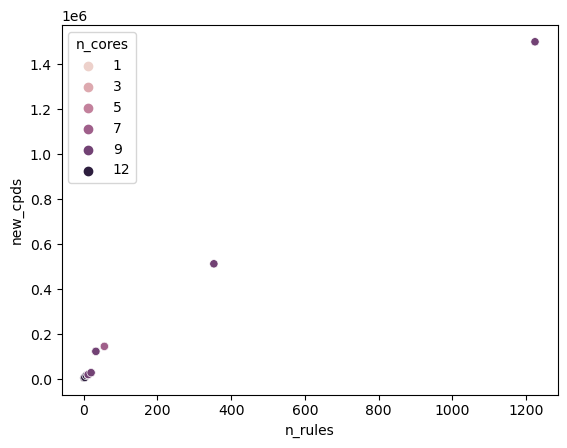

In [113]:
sns.scatterplot(x="n_rules", y="new_cpds", data=pd.json_normalize(run_results_nrule.values()), hue="n_cores")

In [102]:
rule_io, correactant_list, _ = rules.metacyc_generalized(fraction_coverage=1)
pd.read_csv(rule_io, delimiter="\t")

,index,Name,Reactants,SMARTS,Products,Comments
0,0,rule0001,Any;Any,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;Any,A0A060PLD9;A0A0P0YNP7;A0A0P9RZM9;A1XCQ0;A3E242...
1,1,rule0002,Any;NAD_CoF,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,NADH_CoF;Any,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
2,2,rule0003,NADH_CoF;Any,[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,Any;NAD_CoF,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
3,3,rule0004,Any;NADH_CoF;O2,[#6:1].[#6:2]1=[#6:3]-[#7:4]-[#6:5]=[#6:6]-[#6...,Any;NAD_CoF;WATER,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...
4,4,rule0005,Any;NAD_CoF;WATER,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,Any;NADH_CoF;O2,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...
...,...,...,...,...,...,...
1211,1219,rule1220,Any;PPI;Pi,[#6:1]-[#16+:2].[#8:3].[#8:4]-[#15:5]-[#8:6]>>...,Any;Any;WATER,A4ULF8;B0YIL2;B0YIL4;B0YIL6;B7SU41;C8ZLJ7;CYP1...
1212,1220,rule1221,PPI;Any,[#8:1].[#8:2]-[#15:3]>>[#8:2].[#8:1]-[#15:3],SULFATE;Any,A1AVC7;B0FWC4;B2NIE7;B8CBW8;I1LWX5;I1N6H7;I1NG...
1213,1221,rule1222,SULFATE;Any,[#8:1].[#8:2]-[#15:3]>>[#8:2].[#8:1]-[#15:3],PPI;Any,A1AVC7;B0FWC4;B2NIE7;B8CBW8;I1LWX5;I1N6H7;I1NG...
1214,1222,rule1223,Any;CO2;NH3,[#6:1]-[#8:2].[#6:3]=[#8:4].[#7:5]>>[#6:1]-[#8...,Any;WATER,NaN


[13:15:07] Explicit valence for atom # 14 C, 5, is greater than permitted
[13:15:07] Explicit valence for atom # 14 C, 5, is greater than permitted
[13:15:07] Explicit valence for atom # 14 C, 5, is greater than permitted
[13:15:07] Explicit valence for atom # 14 C, 5, is greater than permitted
[13:15:44] Explicit valence for atom # 14 C, 5, is greater than permitted
[13:15:44] Explicit valence for atom # 14 C, 5, is greater than permitted
[13:15:44] Explicit valence for atom # 14 C, 5, is greater than permitted
[13:15:44] Explicit valence for atom # 14 C, 5, is greater than permitted
